In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('bank_churn_model.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1706,1707,15788483,Kerr,719,Spain,Male,38,0,0.00,1,1,0,126876.47,0
2382,2383,15693259,Wallace,676,France,Male,30,1,128207.23,1,1,1,55400.17,0
8919,8920,15794323,Buckley,673,France,Male,32,8,121240.76,1,1,0,116969.73,0
9712,9713,15701768,Tung,637,France,Male,32,3,0.00,2,1,1,197827.06,0
741,742,15716835,Rossi,546,France,Male,24,8,156325.38,1,1,1,125381.02,0


In [3]:
df.drop(['RowNumber','CustomerId'],axis='columns',inplace = True)
df.drop(['Surname'],axis='columns',inplace = True)

In [4]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3579,778,Germany,Male,31,9,182275.23,2,1,0,190631.23,0
5099,595,Germany,Female,45,9,106000.12,1,0,0,191448.96,1
7422,622,France,Male,29,7,101486.96,1,1,1,8788.35,0
1456,639,Spain,Male,28,8,0.00,2,1,0,126561.07,0
1912,687,Germany,Female,29,4,78939.15,1,1,0,122134.56,1


In [5]:
df.Gender.replace({'Female':1,'Male':0},inplace=True)

In [6]:
df = pd.get_dummies(data = df,columns = ['Geography'])

In [7]:
columns_to_scale = []
for column in df:
    if len(df[column].unique())>2:
        columns_to_scale.append(column)
columns_to_scale

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [8]:
from sklearn.preprocessing import MinMaxScaler
df[columns_to_scale] = MinMaxScaler().fit_transform(df[columns_to_scale])

In [9]:
df.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8309,0.798,1,0.121622,0.9,0.000000,0.333333,1,0,0.663680,0,1,0,0
2339,0.602,0,0.108108,0.5,0.586044,0.000000,0,0,0.708826,0,0,1,0
2497,0.526,0,0.027027,0.3,0.000000,0.333333,1,1,0.748082,0,1,0,0


In [10]:
from sklearn.model_selection import train_test_split as tts
X = df.drop('Exited',axis = 'columns')
y = df['Exited']

X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.2, random_state = 5)
X_train.shape

(8000, 12)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict = model.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.57      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



In [21]:
import seaborn as sn
cm = confusion_matrix(y_test,y_predict)
plt.figure(figsize = (10,7))
cm.shape

(2, 2)

<Figure size 720x504 with 0 Axes>

Text(69.0, 0.5, 'Truth')

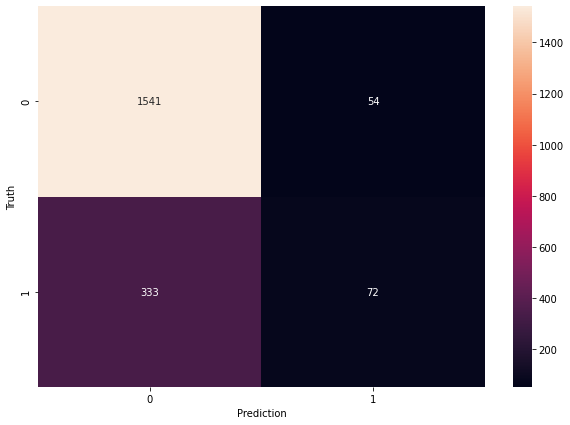

In [22]:
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [26]:
(2*0.57*0.18)/(.57+.18)

0.27359999999999995

In [33]:
def logisticRegression(X_train,X_test,y_train,y_test,weights):
    model = LogisticRegression()
    
    if weights == -1:
        model.fit(X_train,y_train)
    else:
        model.fit(X_train,y_train,class_weight=weigts)
    
#     print(model.evaluate(X_test,y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    print("Classification Report:")
    print(classification_report(y_test,y_preds))
    
    return y_preds

In [34]:
y_preds = logisticRegression(X_train,X_test,y_train,y_test,-1)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.57      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



<h3>Under Sampling</h3>

In [36]:
df2 = df.copy()

In [37]:
count_class_0, count_class_1 = df2.Exited.value_counts()

df_class_0 = df2[df2.Exited == 0]
df_class_1 = df2[df2.Exited == 1]

In [38]:
df_class_0.shape,df_class_1.shape

((7963, 13), (2037, 13))

In [39]:
df_test_under = pd.concat([df_class_0.sample(count_class_1),df_class_1],axis='index')
print('Random Under-sampling')
print(df_test_under.Exited.value_counts())

Random Under-sampling
0    2037
1    2037
Name: Exited, dtype: int64


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df_test_under.drop('Exited',axis=1)
y = df_test_under.Exited

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [42]:
y_train.value_counts(),y_test.value_counts()

(1    1630
 0    1629
 Name: Exited, dtype: int64,
 0    408
 1    407
 Name: Exited, dtype: int64)

In [43]:
y_preds = logisticRegression(X_train,X_test,y_train,y_test,-1)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       408
           1       0.72      0.69      0.70       407

    accuracy                           0.71       815
   macro avg       0.71      0.71      0.71       815
weighted avg       0.71      0.71      0.71       815



<h3>Method 2: oversampling</h3>

In [44]:
count_class_0,count_class_1

(7963, 2037)

In [45]:
df_test_over = pd.concat([df_class_0,df_class_1.sample(count_class_0,replace=True)],axis=0)
print('Random Over-sampling')
print(df_test_over.Exited.value_counts())

Random Over-sampling
0    7963
1    7963
Name: Exited, dtype: int64


In [46]:
X = df_test_over.drop('Exited',axis=1)
y = df_test_over.Exited

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [47]:
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [48]:
y_preds = logisticRegression(X_train,X_test,y_train,y_test,-1)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1593
           1       0.71      0.71      0.71      1593

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



<h3>method 3: SMOTE </h3>

In [49]:
X = df2.drop('Exited',axis=1)
y = df2.Exited

In [50]:
!pip install imbalanced-learn

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [51]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,stratify=y_sm)

In [54]:
y_preds = logisticRegression(X_train,X_test,y_train,y_test,-1)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1593
           1       0.72      0.71      0.71      1593

    accuracy                           0.72      3186
   macro avg       0.72      0.72      0.72      3186
weighted avg       0.72      0.72      0.72      3186



<h3> Method 4: Use of Ensemble with under sampling </h3>

In [55]:
X = df2.drop('Exited',axis=1)
y = df2.Exited

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [57]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [58]:
count_class_0,count_class_1

(7963, 2037)

In [59]:
df3 = X_train.copy()
df3['Exited']=y_train

In [60]:
df3_majority = df3[df3.Exited == 0]
df3_minority = df3[df3.Exited == 1]

In [61]:
def  get_train_batch(df_majority,df_minority,start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis = 0)
    
    X_train = df_train.drop('Exited',axis='columns')
    y_train = df_train.Exited
    
    return X_train,y_train

In [62]:
X_train,y_train = get_train_batch(df3_majority,df3_minority,0,1495)

y_pred1 = logisticRegression(X_train,X_test,y_train,y_test,-1)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.77      1593
           1       0.37      0.76      0.50       407

    accuracy                           0.69      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.69      0.72      2000



In [63]:
X_train,y_train = get_train_batch(df3_majority,df3_minority,1495,1495*2)

y_pred2 = logisticRegression(X_train,X_test,y_train,y_test,-1)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1593
           1       0.36      0.76      0.49       407

    accuracy                           0.68      2000
   macro avg       0.64      0.71      0.63      2000
weighted avg       0.80      0.68      0.71      2000



In [64]:
X_train,y_train = get_train_batch(df3_majority,df3_minority,1495*2,count_class_0)

y_pred3 = logisticRegression(X_train,X_test,y_train,y_test,-1)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1593
           1       0.52      0.47      0.49       407

    accuracy                           0.80      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000



In [65]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    cnt = y_pred1[i]+y_pred2[i]+y_pred3[i]
    if cnt>1:
        y_pred_final[i]=1.0
    else:
        y_pred_final[i]=0

In [66]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1593
           1       0.38      0.74      0.50       407

    accuracy                           0.70      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.70      0.73      2000

